# Subtask VECTOR.3

Clustering embeddings

Based on guidance from:

- <https://www.kdnuggets.com/2018/04/robust-word2vec-models-gensim.html>

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style("whitegrid")

# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from gensim.models import KeyedVectors

In [48]:
# Load embeddings
model = KeyedVectors.load("Standalone_01/output_embedding/config3.embeddings", mmap="r")

In [51]:
# https://github.com/RaRe-Technologies/gensim/blob/2feef89a24c222e4e0fc6e32ac7c6added752c26/gensim/models/keyedvectors.py
keys = model.wv.key_to_index
embeddings_data= wv.wv[keys]

 # Number of word embeddings, word embeddings vs embedding size (100)
len(keys), embeddings_data.shape

(26555, (26555, 100))

In [194]:
def visualise_clusters(terms_of_interest_list: list, topn: int = 30, figsize: tuple = (20, 15)) -> None:
    """
    We won't do negative terms here as they have to be specific to each provided term of interest, i.e. cluster centre.
    """
    # term.split(" ") is to allow for phrases - "new york" will be used as ["new", "york"]
    similar_interesting_terms = {pos_term: [item[0] for item in model.wv.most_similar_cosmul(positive=pos_term.split(" "), topn=topn)] for pos_term in terms_of_interest_list}
    similar_words = sum([[k] + v for k, v in similar_interesting_terms.items()], []) + terms_of_interest_list # Adding this so we can find them later on the plot
    similar_words_model = model.wv[similar_words]

    tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
    np.set_printoptions(suppress=True)
    T = tsne.fit_transform(similar_words_model)
    labels = similar_words

    plt.figure(figsize=figsize)
    plt.scatter(T[:, 0], T[:, 1], c="orange", edgecolors="red")
    fig = plt.gcf()
    ax = fig.gca()

    for label, x, y in zip(labels, T[:, 0], T[:, 1]):
        # Slightly crude condition to locate and highlight the 
        # cluster centres, or original terms of interest on the plot
        if label in terms_of_interest_list:
            centre_highlight = plt.Circle((x, y), 20.0, color="blue", fill=False)
            plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords="offset points", color="blue")
            ax.add_patch(centre_highlight)
        else:
            plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords="offset points")


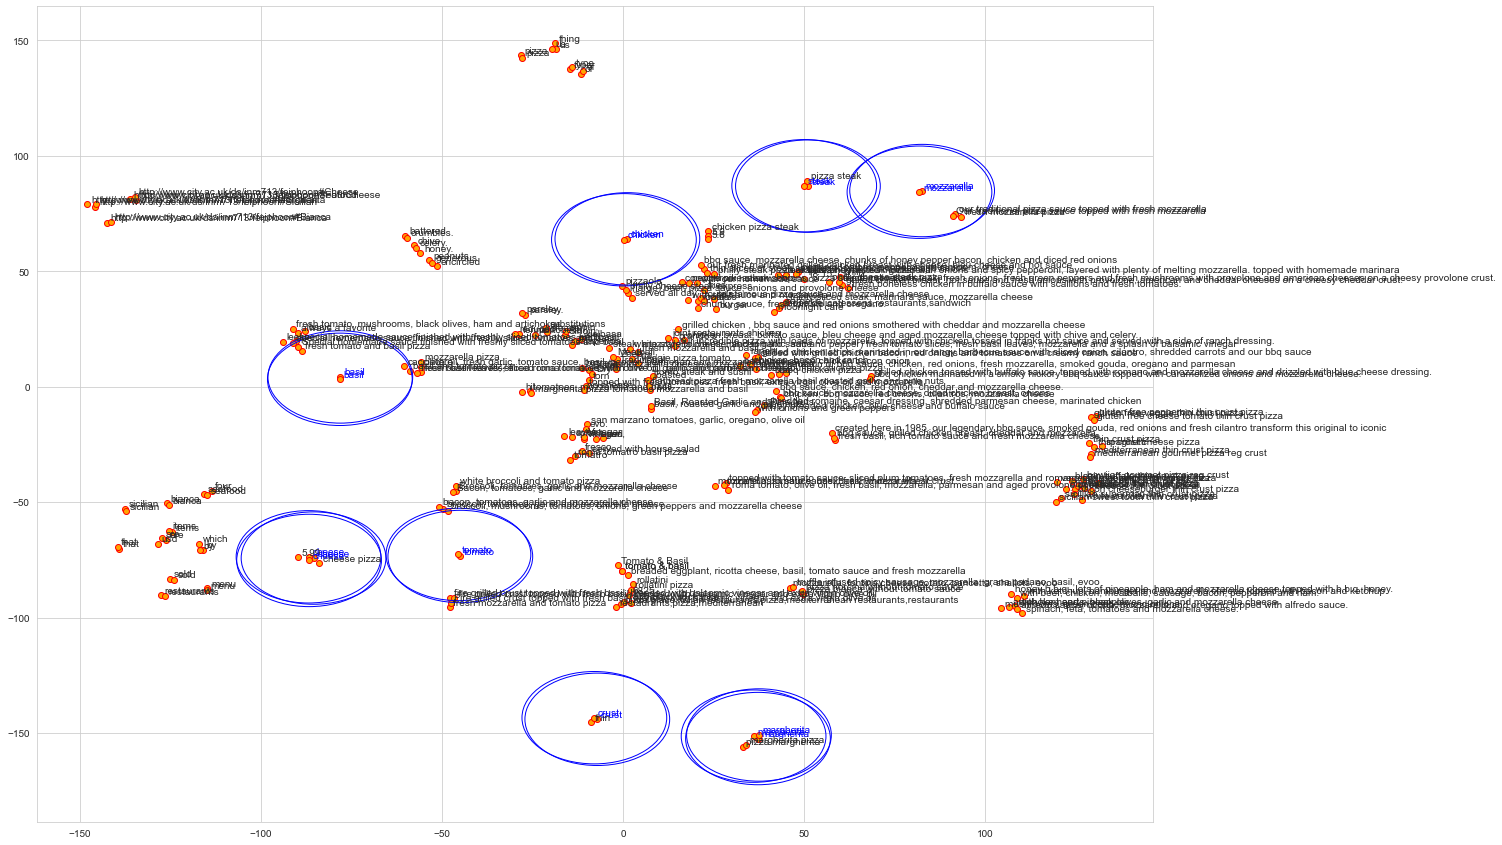

In [195]:
interesting_terms_margherita = ["margherita", "tomato", "cheese", "mozzarella", "basil", "crust", "chicken", "steak"]
visualise_clusters(terms_of_interest_list=interesting_terms_margherita)

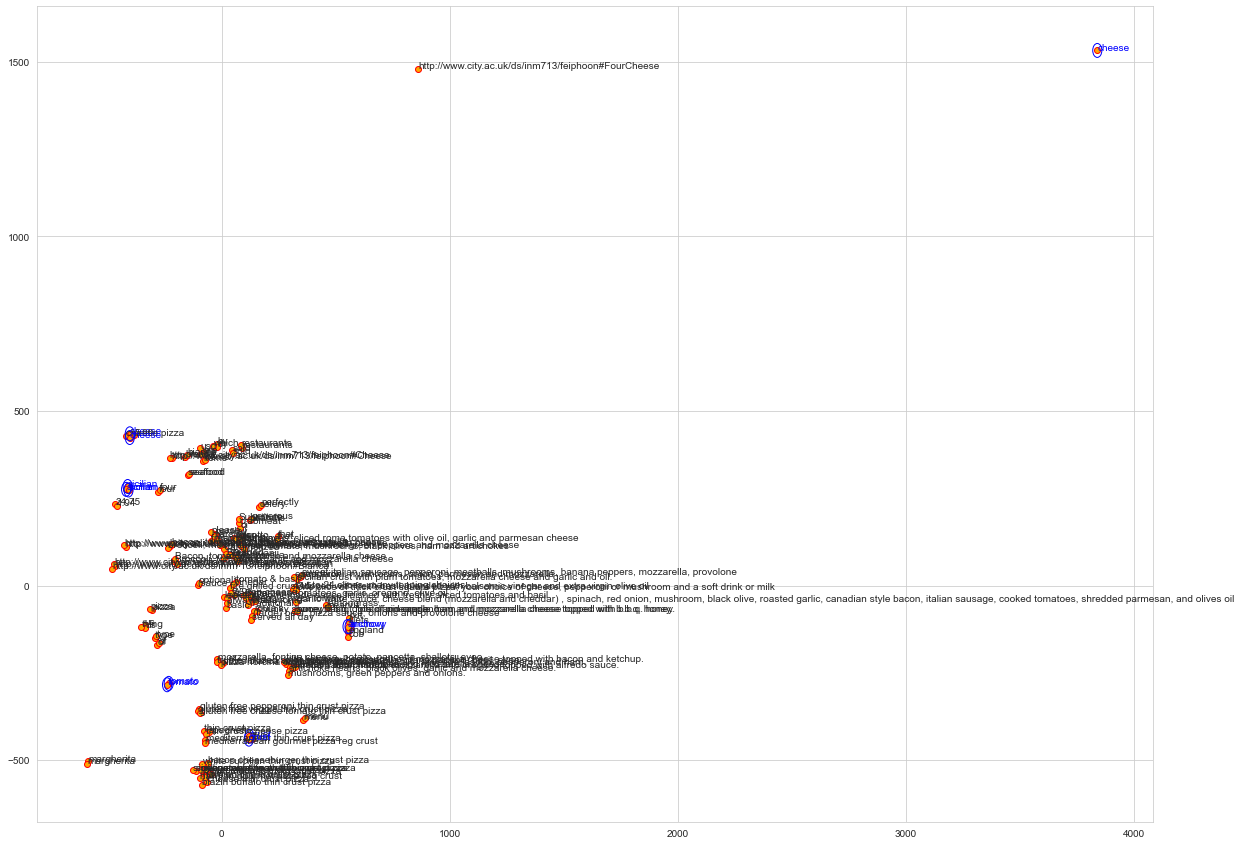

In [196]:
interesting_terms_sicilian_uri = ["sicilian", "crust", "tomato", "anchovy", "cheese"]
visualise_clusters(terms_of_interest_list=interesting_terms_sicilian_uri, topn=30)

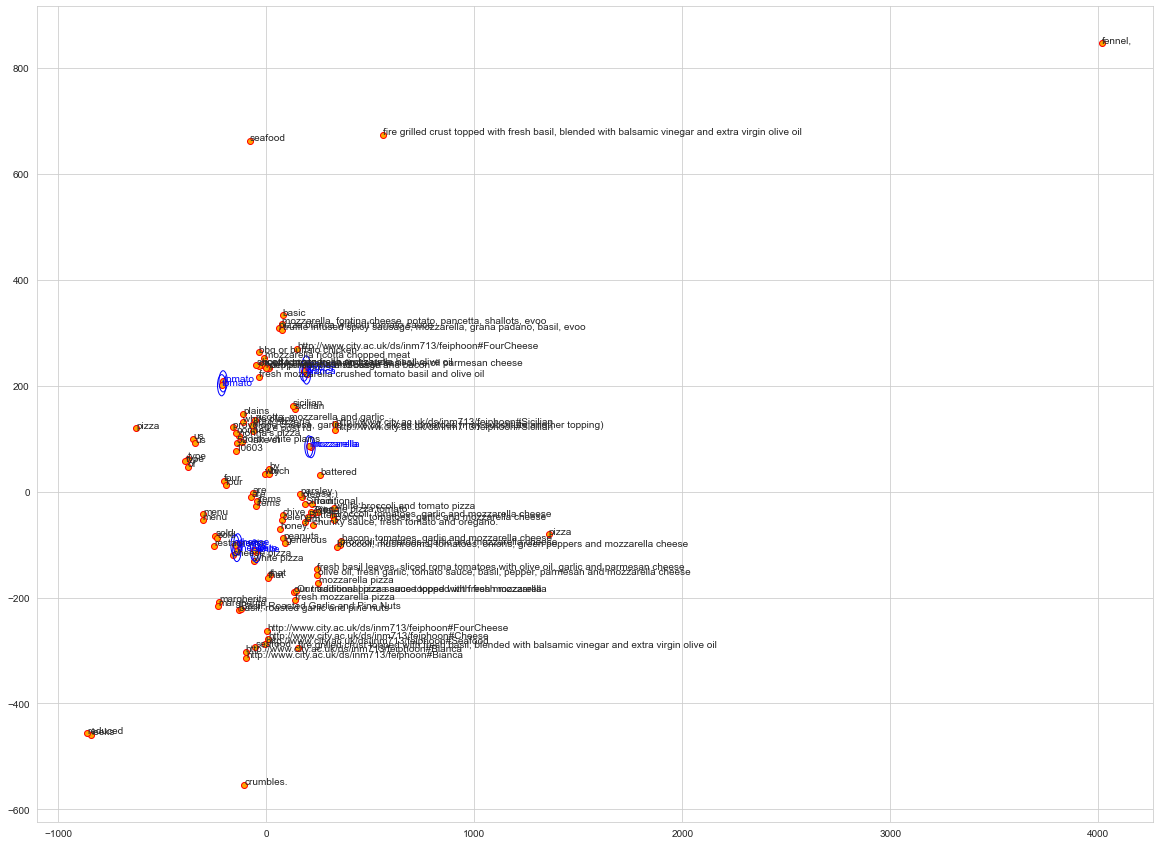

In [199]:
interesting_terms_bianca_uri = ["bianca", "tomato", "cheese", "mozzarella", "white"]
visualise_clusters(terms_of_interest_list=interesting_terms_bianca_uri, topn=20)